In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
import tensorflow as tf
from tensorflow import keras

Download and prepare the MNIST dataset

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Create Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Add Dense layer on top

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.1515 - accuracy: 0.9522
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0456 - accuracy: 0.9859
Epoch 3/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0334 - accuracy: 0.9893
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0255 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0203 - accuracy: 0.9934


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.0343 - accuracy: 0.9886


In [10]:
print(test_acc)

0.9886


TEST single image

In [11]:
image = (train_images[1]).reshape(1,28,28,1) # 1->'2';    
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 0


Testing multiple images

Test images shape: (4, 28, 28)
Predicted digit: 6
Predicted digit: 0
Predicted digit: 4
Predicted digit: 5


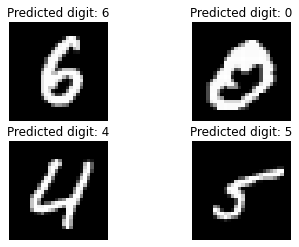

In [12]:

test_images = train_images[62:66]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

# NOW TRYING FOR HYPERPARAMETER TUNING

In [13]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [2,3]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.MaxPooling2D(pool_size=(2, 2))
    ,  
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size=(2, 2))
      ,
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [14]:
!pip install keras-tuner

     |████████████████████████████████| 54 kB 1.4 MB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73198 sha256=4e22c9d7f86926776f0c27ef3b8d7e90f034437694c0949709bc34465f4b793e
  Stored in directory: /root/.cache/pip/wheels/33/f0/c8/218919df808b66696bdb2fbc2261ae74412383483226b0b31d
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=d9ee5dfdba137df2c5ec4070c59e42381b4e6407f00788527c650a7719af7585
  Stored in directory: /root/.cache/pip/wheels/86/1b/58/c23af2fe683acd8edc15d5a1268f0242be1ff2cf827fe34737
Successfully built keras-tuner terminaltables


In [17]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
test_images.shape

(10000, 28, 28, 1)

In [20]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [21]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name="MNIST DIGIT RECOGNITION")

In [22]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - ETA: 11:49 - loss: 2.3186 - accuracy: 0.031 - ETA: 1:05 - loss: 2.3457 - accuracy: 0.083 - ETA: 37s - loss: 2.1843 - accuracy: 0.1549 - ETA: 27s - loss: 1.9560 - accuracy: 0.259 - ETA: 21s - loss: 1.7662 - accuracy: 0.338 - ETA: 19s - loss: 1.5923 - accuracy: 0.412 - ETA: 16s - loss: 1.4182 - accuracy: 0.478 - ETA: 15s - loss: 1.2926 - accuracy: 0.529 - ETA: 14s - loss: 1.2205 - accuracy: 0.558 - ETA: 13s - loss: 1.1329 - accuracy: 0.594 - ETA: 12s - loss: 1.0626 - accuracy: 0.622 - ETA: 12s - loss: 0.9995 - accuracy: 0.645 - ETA: 11s - loss: 0.9432 - accuracy: 0.665 - ETA: 11s - loss: 0.8982 - accuracy: 0.681 - ETA: 10s - loss: 0.8531 - accuracy: 0.698 - ETA: 10s - loss: 0.8149 - accuracy: 0.711 - ETA: 10s - loss: 0.7808 - accuracy: 0.724 - ETA: 9s - loss: 0.7586 - accuracy: 0.734 - ETA: 9s - loss: 0.7383 - accuracy: 0.74 - ETA: 9s - loss: 0.7137 - accuracy: 0.75 - ETA: 9s - loss:

54000/54000 [==============================] - ETA: 10s - loss: 0.0866 - accuracy: 0.968 - ETA: 6s - loss: 0.2083 - accuracy: 0.933 - ETA: 6s - loss: 0.1551 - accuracy: 0.95 - ETA: 6s - loss: 0.1301 - accuracy: 0.95 - ETA: 6s - loss: 0.1112 - accuracy: 0.96 - ETA: 6s - loss: 0.1075 - accuracy: 0.96 - ETA: 6s - loss: 0.1056 - accuracy: 0.96 - ETA: 6s - loss: 0.1017 - accuracy: 0.96 - ETA: 6s - loss: 0.1015 - accuracy: 0.96 - ETA: 6s - loss: 0.1048 - accuracy: 0.96 - ETA: 6s - loss: 0.1098 - accuracy: 0.96 - ETA: 6s - loss: 0.1084 - accuracy: 0.96 - ETA: 6s - loss: 0.1100 - accuracy: 0.96 - ETA: 6s - loss: 0.1062 - accuracy: 0.96 - ETA: 6s - loss: 0.1111 - accuracy: 0.96 - ETA: 6s - loss: 0.1135 - accuracy: 0.96 - ETA: 6s - loss: 0.1131 - accuracy: 0.96 - ETA: 6s - loss: 0.1133 - accuracy: 0.96 - ETA: 6s - loss: 0.1159 - accuracy: 0.96 - ETA: 6s - loss: 0.1196 - accuracy: 0.96 - ETA: 6s - loss: 0.1185 - accuracy: 0.96 - ETA: 6s - loss: 0.1198 - accuracy: 0.96 - ETA: 6s - loss: 0.1206 - a

54000/54000 [==============================] - ETA: 10s - loss: 0.0465 - accuracy: 0.968 - ETA: 6s - loss: 0.0795 - accuracy: 0.975 - ETA: 6s - loss: 0.0827 - accuracy: 0.97 - ETA: 6s - loss: 0.0856 - accuracy: 0.97 - ETA: 6s - loss: 0.0813 - accuracy: 0.97 - ETA: 6s - loss: 0.0854 - accuracy: 0.97 - ETA: 6s - loss: 0.0884 - accuracy: 0.97 - ETA: 6s - loss: 0.0881 - accuracy: 0.97 - ETA: 6s - loss: 0.0854 - accuracy: 0.97 - ETA: 6s - loss: 0.0835 - accuracy: 0.97 - ETA: 6s - loss: 0.0801 - accuracy: 0.97 - ETA: 6s - loss: 0.0868 - accuracy: 0.97 - ETA: 6s - loss: 0.0909 - accuracy: 0.97 - ETA: 6s - loss: 0.0893 - accuracy: 0.97 - ETA: 6s - loss: 0.0900 - accuracy: 0.97 - ETA: 6s - loss: 0.0892 - accuracy: 0.97 - ETA: 6s - loss: 0.0911 - accuracy: 0.97 - ETA: 6s - loss: 0.0933 - accuracy: 0.97 - ETA: 6s - loss: 0.0929 - accuracy: 0.97 - ETA: 6s - loss: 0.0975 - accuracy: 0.97 - ETA: 5s - loss: 0.0994 - accuracy: 0.97 - ETA: 5s - loss: 0.1021 - accuracy: 0.97 - ETA: 5s - loss: 0.1043 - a

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - ETA: 12:56 - loss: 2.2982 - accuracy: 0.093 - ETA: 1:05 - loss: 2.2087 - accuracy: 0.206 - ETA: 35s - loss: 1.6903 - accuracy: 0.4135 - ETA: 28s - loss: 1.4064 - accuracy: 0.510 - ETA: 25s - loss: 1.2766 - accuracy: 0.553 - ETA: 21s - loss: 1.1324 - accuracy: 0.600 - ETA: 18s - loss: 1.0084 - accuracy: 0.652 - ETA: 16s - loss: 0.9144 - accuracy: 0.688 - ETA: 14s - loss: 0.8399 - accuracy: 0.714 - ETA: 13s - loss: 0.7858 - accuracy: 0.735 - ETA: 12s - loss: 0.7328 - accuracy: 0.755 - ETA: 12s - loss: 0.6792 - accuracy: 0.773 - ETA: 11s - loss: 0.6456 - accuracy: 0.786 - ETA: 10s - loss: 0.6107 - accuracy: 0.797 - ETA: 10s - loss: 0.5800 - accuracy: 0.807 - ETA: 10s - loss: 0.5545 - accuracy: 0.816 - ETA: 9s - loss: 0.5333 - accuracy: 0.824 - ETA: 9s - loss: 0.5109 - accuracy: 0.83 - ETA: 9s - loss: 0.4900 - accuracy: 0.83 - ETA: 8s - loss: 0.4716 - accuracy: 0.84 - ETA: 8s - loss: 0

54000/54000 [==============================] - ETA: 15s - loss: 0.0050 - accuracy: 1.000 - ETA: 6s - loss: 0.0635 - accuracy: 0.977 - ETA: 6s - loss: 0.0839 - accuracy: 0.97 - ETA: 6s - loss: 0.0803 - accuracy: 0.97 - ETA: 6s - loss: 0.0806 - accuracy: 0.97 - ETA: 6s - loss: 0.0931 - accuracy: 0.97 - ETA: 6s - loss: 0.0935 - accuracy: 0.97 - ETA: 6s - loss: 0.1035 - accuracy: 0.97 - ETA: 6s - loss: 0.1105 - accuracy: 0.97 - ETA: 6s - loss: 0.1076 - accuracy: 0.97 - ETA: 6s - loss: 0.1069 - accuracy: 0.97 - ETA: 6s - loss: 0.1017 - accuracy: 0.97 - ETA: 6s - loss: 0.1034 - accuracy: 0.97 - ETA: 6s - loss: 0.1041 - accuracy: 0.97 - ETA: 5s - loss: 0.1084 - accuracy: 0.97 - ETA: 5s - loss: 0.1096 - accuracy: 0.97 - ETA: 5s - loss: 0.1063 - accuracy: 0.97 - ETA: 5s - loss: 0.1042 - accuracy: 0.97 - ETA: 5s - loss: 0.1042 - accuracy: 0.97 - ETA: 5s - loss: 0.1050 - accuracy: 0.97 - ETA: 5s - loss: 0.1081 - accuracy: 0.96 - ETA: 5s - loss: 0.1078 - accuracy: 0.96 - ETA: 5s - loss: 0.1069 - a

54000/54000 [==============================] - ETA: 10s - loss: 0.0589 - accuracy: 0.968 - ETA: 6s - loss: 0.1032 - accuracy: 0.972 - ETA: 6s - loss: 0.0931 - accuracy: 0.97 - ETA: 6s - loss: 0.0868 - accuracy: 0.97 - ETA: 6s - loss: 0.0856 - accuracy: 0.97 - ETA: 6s - loss: 0.0930 - accuracy: 0.97 - ETA: 6s - loss: 0.0980 - accuracy: 0.97 - ETA: 6s - loss: 0.0956 - accuracy: 0.97 - ETA: 6s - loss: 0.0964 - accuracy: 0.97 - ETA: 6s - loss: 0.0903 - accuracy: 0.97 - ETA: 6s - loss: 0.0944 - accuracy: 0.97 - ETA: 6s - loss: 0.1040 - accuracy: 0.97 - ETA: 6s - loss: 0.1096 - accuracy: 0.96 - ETA: 5s - loss: 0.1100 - accuracy: 0.96 - ETA: 5s - loss: 0.1076 - accuracy: 0.96 - ETA: 5s - loss: 0.1057 - accuracy: 0.96 - ETA: 5s - loss: 0.1063 - accuracy: 0.96 - ETA: 5s - loss: 0.1061 - accuracy: 0.96 - ETA: 5s - loss: 0.1038 - accuracy: 0.96 - ETA: 5s - loss: 0.1010 - accuracy: 0.96 - ETA: 5s - loss: 0.1008 - accuracy: 0.97 - ETA: 5s - loss: 0.1021 - accuracy: 0.97 - ETA: 5s - loss: 0.1009 - a

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - ETA: 12:02 - loss: 2.2947 - accuracy: 0.093 - ETA: 1:06 - loss: 2.1814 - accuracy: 0.299 - ETA: 52s - loss: 1.9095 - accuracy: 0.3824 - ETA: 37s - loss: 1.6414 - accuracy: 0.462 - ETA: 28s - loss: 1.3400 - accuracy: 0.565 - ETA: 23s - loss: 1.1636 - accuracy: 0.628 - ETA: 20s - loss: 1.0349 - accuracy: 0.667 - ETA: 19s - loss: 0.9654 - accuracy: 0.688 - ETA: 18s - loss: 0.9162 - accuracy: 0.704 - ETA: 18s - loss: 0.8543 - accuracy: 0.725 - ETA: 17s - loss: 0.8104 - accuracy: 0.739 - ETA: 15s - loss: 0.7548 - accuracy: 0.758 - ETA: 14s - loss: 0.7083 - accuracy: 0.774 - ETA: 13s - loss: 0.6577 - accuracy: 0.791 - ETA: 13s - loss: 0.6170 - accuracy: 0.803 - ETA: 12s - loss: 0.5858 - accuracy: 0.812 - ETA: 11s - loss: 0.5564 - accuracy: 0.822 - ETA: 11s - loss: 0.5278 - accuracy: 0.830 - ETA: 10s - loss: 0.5097 - accuracy: 0.836 - ETA: 10s - loss: 0.4935 - accuracy: 0.841 - ETA: 10s -

54000/54000 [==============================] - ETA: 13s - loss: 0.0595 - accuracy: 0.968 - ETA: 6s - loss: 0.0546 - accuracy: 0.981 - ETA: 6s - loss: 0.0621 - accuracy: 0.98 - ETA: 6s - loss: 0.0789 - accuracy: 0.97 - ETA: 7s - loss: 0.0793 - accuracy: 0.97 - ETA: 7s - loss: 0.0748 - accuracy: 0.98 - ETA: 6s - loss: 0.0754 - accuracy: 0.98 - ETA: 6s - loss: 0.0787 - accuracy: 0.97 - ETA: 6s - loss: 0.0800 - accuracy: 0.97 - ETA: 6s - loss: 0.0764 - accuracy: 0.97 - ETA: 6s - loss: 0.0783 - accuracy: 0.97 - ETA: 6s - loss: 0.0797 - accuracy: 0.97 - ETA: 6s - loss: 0.0785 - accuracy: 0.97 - ETA: 6s - loss: 0.0809 - accuracy: 0.97 - ETA: 6s - loss: 0.0852 - accuracy: 0.97 - ETA: 6s - loss: 0.0862 - accuracy: 0.97 - ETA: 6s - loss: 0.0865 - accuracy: 0.97 - ETA: 6s - loss: 0.0882 - accuracy: 0.97 - ETA: 6s - loss: 0.0893 - accuracy: 0.97 - ETA: 6s - loss: 0.0916 - accuracy: 0.97 - ETA: 6s - loss: 0.0917 - accuracy: 0.97 - ETA: 6s - loss: 0.0910 - accuracy: 0.97 - ETA: 6s - loss: 0.0909 - a

54000/54000 [==============================] - ETA: 10s - loss: 0.0219 - accuracy: 1.000 - ETA: 6s - loss: 0.1255 - accuracy: 0.968 - ETA: 6s - loss: 0.1090 - accuracy: 0.96 - ETA: 6s - loss: 0.0917 - accuracy: 0.97 - ETA: 6s - loss: 0.0864 - accuracy: 0.97 - ETA: 6s - loss: 0.0827 - accuracy: 0.97 - ETA: 6s - loss: 0.0832 - accuracy: 0.97 - ETA: 6s - loss: 0.0832 - accuracy: 0.97 - ETA: 6s - loss: 0.0845 - accuracy: 0.97 - ETA: 6s - loss: 0.0863 - accuracy: 0.97 - ETA: 6s - loss: 0.0849 - accuracy: 0.97 - ETA: 6s - loss: 0.0854 - accuracy: 0.97 - ETA: 6s - loss: 0.0802 - accuracy: 0.97 - ETA: 6s - loss: 0.0805 - accuracy: 0.97 - ETA: 6s - loss: 0.0831 - accuracy: 0.97 - ETA: 6s - loss: 0.0821 - accuracy: 0.97 - ETA: 6s - loss: 0.0819 - accuracy: 0.97 - ETA: 6s - loss: 0.0807 - accuracy: 0.97 - ETA: 5s - loss: 0.0843 - accuracy: 0.97 - ETA: 5s - loss: 0.0850 - accuracy: 0.97 - ETA: 5s - loss: 0.0854 - accuracy: 0.97 - ETA: 5s - loss: 0.0857 - accuracy: 0.97 - ETA: 5s - loss: 0.0849 - a

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - ETA: 11:22 - loss: 2.3122 - accuracy: 0.062 - ETA: 54s - loss: 2.1857 - accuracy: 0.3192  - ETA: 31s - loss: 1.8740 - accuracy: 0.449 - ETA: 22s - loss: 1.5167 - accuracy: 0.548 - ETA: 18s - loss: 1.2907 - accuracy: 0.609 - ETA: 16s - loss: 1.1413 - accuracy: 0.653 - ETA: 14s - loss: 1.0502 - accuracy: 0.679 - ETA: 13s - loss: 0.9527 - accuracy: 0.710 - ETA: 12s - loss: 0.8947 - accuracy: 0.729 - ETA: 11s - loss: 0.8404 - accuracy: 0.745 - ETA: 11s - loss: 0.7914 - accuracy: 0.760 - ETA: 10s - loss: 0.7448 - accuracy: 0.775 - ETA: 10s - loss: 0.7079 - accuracy: 0.786 - ETA: 9s - loss: 0.6867 - accuracy: 0.791 - ETA: 9s - loss: 0.6712 - accuracy: 0.79 - ETA: 9s - loss: 0.6470 - accuracy: 0.80 - ETA: 9s - loss: 0.6199 - accuracy: 0.81 - ETA: 8s - loss: 0.5983 - accuracy: 0.81 - ETA: 8s - loss: 0.5813 - accuracy: 0.82 - ETA: 8s - loss: 0.5629 - accuracy: 0.83 - ETA: 8s - loss: 0.5442 

54000/54000 [==============================] - ETA: 8s - loss: 0.1473 - accuracy: 0.96 - ETA: 7s - loss: 0.0420 - accuracy: 0.98 - ETA: 7s - loss: 0.0512 - accuracy: 0.98 - ETA: 6s - loss: 0.0608 - accuracy: 0.98 - ETA: 6s - loss: 0.0586 - accuracy: 0.98 - ETA: 6s - loss: 0.0622 - accuracy: 0.98 - ETA: 6s - loss: 0.0617 - accuracy: 0.98 - ETA: 6s - loss: 0.0603 - accuracy: 0.98 - ETA: 6s - loss: 0.0585 - accuracy: 0.98 - ETA: 6s - loss: 0.0568 - accuracy: 0.98 - ETA: 6s - loss: 0.0570 - accuracy: 0.98 - ETA: 6s - loss: 0.0565 - accuracy: 0.98 - ETA: 6s - loss: 0.0581 - accuracy: 0.98 - ETA: 5s - loss: 0.0613 - accuracy: 0.98 - ETA: 5s - loss: 0.0601 - accuracy: 0.98 - ETA: 5s - loss: 0.0600 - accuracy: 0.98 - ETA: 5s - loss: 0.0595 - accuracy: 0.98 - ETA: 5s - loss: 0.0597 - accuracy: 0.98 - ETA: 5s - loss: 0.0580 - accuracy: 0.98 - ETA: 5s - loss: 0.0569 - accuracy: 0.98 - ETA: 5s - loss: 0.0569 - accuracy: 0.98 - ETA: 5s - loss: 0.0581 - accuracy: 0.98 - ETA: 5s - loss: 0.0586 - accu

54000/54000 [==============================] - ETA: 9s - loss: 0.0165 - accuracy: 1.00 - ETA: 6s - loss: 0.0213 - accuracy: 0.99 - ETA: 6s - loss: 0.0292 - accuracy: 0.99 - ETA: 6s - loss: 0.0317 - accuracy: 0.98 - ETA: 6s - loss: 0.0382 - accuracy: 0.98 - ETA: 6s - loss: 0.0383 - accuracy: 0.98 - ETA: 6s - loss: 0.0371 - accuracy: 0.98 - ETA: 6s - loss: 0.0339 - accuracy: 0.98 - ETA: 6s - loss: 0.0382 - accuracy: 0.98 - ETA: 6s - loss: 0.0368 - accuracy: 0.98 - ETA: 6s - loss: 0.0362 - accuracy: 0.98 - ETA: 6s - loss: 0.0346 - accuracy: 0.99 - ETA: 6s - loss: 0.0337 - accuracy: 0.99 - ETA: 5s - loss: 0.0347 - accuracy: 0.98 - ETA: 5s - loss: 0.0332 - accuracy: 0.99 - ETA: 5s - loss: 0.0334 - accuracy: 0.99 - ETA: 5s - loss: 0.0334 - accuracy: 0.99 - ETA: 5s - loss: 0.0331 - accuracy: 0.99 - ETA: 5s - loss: 0.0336 - accuracy: 0.98 - ETA: 5s - loss: 0.0345 - accuracy: 0.98 - ETA: 5s - loss: 0.0349 - accuracy: 0.98 - ETA: 5s - loss: 0.0357 - accuracy: 0.98 - ETA: 5s - loss: 0.0362 - accu

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - ETA: 11:19 - loss: 2.3011 - accuracy: 0.156 - ETA: 58s - loss: 2.1944 - accuracy: 0.2019  - ETA: 33s - loss: 1.9016 - accuracy: 0.351 - ETA: 24s - loss: 1.6015 - accuracy: 0.465 - ETA: 20s - loss: 1.3702 - accuracy: 0.543 - ETA: 17s - loss: 1.2098 - accuracy: 0.597 - ETA: 15s - loss: 1.0855 - accuracy: 0.637 - ETA: 13s - loss: 0.9819 - accuracy: 0.674 - ETA: 12s - loss: 0.9014 - accuracy: 0.699 - ETA: 12s - loss: 0.8395 - accuracy: 0.721 - ETA: 11s - loss: 0.7854 - accuracy: 0.740 - ETA: 11s - loss: 0.7395 - accuracy: 0.756 - ETA: 10s - loss: 0.7014 - accuracy: 0.768 - ETA: 10s - loss: 0.6739 - accuracy: 0.778 - ETA: 9s - loss: 0.6407 - accuracy: 0.789 - ETA: 9s - loss: 0.6088 - accuracy: 0.79 - ETA: 9s - loss: 0.5813 - accuracy: 0.80 - ETA: 9s - loss: 0.5556 - accuracy: 0.81 - ETA: 8s - loss: 0.5368 - accuracy: 0.82 - ETA: 8s - loss: 0.5158 - accuracy: 0.83 - ETA: 8s - loss: 0.496

54000/54000 [==============================] - ETA: 10s - loss: 0.0191 - accuracy: 1.000 - ETA: 7s - loss: 0.0550 - accuracy: 0.988 - ETA: 6s - loss: 0.0511 - accuracy: 0.98 - ETA: 8s - loss: 0.0514 - accuracy: 0.98 - ETA: 10s - loss: 0.0503 - accuracy: 0.987 - ETA: 12s - loss: 0.0499 - accuracy: 0.987 - ETA: 12s - loss: 0.0510 - accuracy: 0.986 - ETA: 11s - loss: 0.0499 - accuracy: 0.987 - ETA: 11s - loss: 0.0505 - accuracy: 0.987 - ETA: 11s - loss: 0.0495 - accuracy: 0.987 - ETA: 11s - loss: 0.0465 - accuracy: 0.987 - ETA: 11s - loss: 0.0467 - accuracy: 0.987 - ETA: 11s - loss: 0.0471 - accuracy: 0.986 - ETA: 12s - loss: 0.0478 - accuracy: 0.986 - ETA: 11s - loss: 0.0477 - accuracy: 0.986 - ETA: 11s - loss: 0.0515 - accuracy: 0.984 - ETA: 11s - loss: 0.0508 - accuracy: 0.984 - ETA: 11s - loss: 0.0513 - accuracy: 0.983 - ETA: 10s - loss: 0.0509 - accuracy: 0.984 - ETA: 10s - loss: 0.0519 - accuracy: 0.984 - ETA: 9s - loss: 0.0512 - accuracy: 0.984 - ETA: 9s - loss: 0.0510 - accuracy: 

54000/54000 [==============================] - ETA: 10s - loss: 0.0862 - accuracy: 0.968 - ETA: 7s - loss: 0.0284 - accuracy: 0.988 - ETA: 7s - loss: 0.0233 - accuracy: 0.99 - ETA: 8s - loss: 0.0261 - accuracy: 0.99 - ETA: 9s - loss: 0.0335 - accuracy: 0.99 - ETA: 9s - loss: 0.0286 - accuracy: 0.99 - ETA: 9s - loss: 0.0263 - accuracy: 0.99 - ETA: 9s - loss: 0.0290 - accuracy: 0.99 - ETA: 9s - loss: 0.0276 - accuracy: 0.99 - ETA: 9s - loss: 0.0259 - accuracy: 0.99 - ETA: 9s - loss: 0.0268 - accuracy: 0.99 - ETA: 9s - loss: 0.0278 - accuracy: 0.99 - ETA: 9s - loss: 0.0263 - accuracy: 0.99 - ETA: 9s - loss: 0.0266 - accuracy: 0.99 - ETA: 9s - loss: 0.0264 - accuracy: 0.99 - ETA: 9s - loss: 0.0267 - accuracy: 0.99 - ETA: 9s - loss: 0.0274 - accuracy: 0.99 - ETA: 9s - loss: 0.0278 - accuracy: 0.99 - ETA: 9s - loss: 0.0273 - accuracy: 0.99 - ETA: 9s - loss: 0.0284 - accuracy: 0.99 - ETA: 8s - loss: 0.0280 - accuracy: 0.99 - ETA: 8s - loss: 0.0274 - accuracy: 0.99 - ETA: 8s - loss: 0.0277 - a

In [23]:
model=tuner_search.get_best_models(num_models=1)[0]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        64576     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 112)               6

In [25]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Train on 54000 samples, validate on 6000 samples
Epoch 4/10
54000/54000 [==============================] - ETA: 10:19 - loss: 0.0022 - accuracy: 1.000 - ETA: 50s - loss: 0.0325 - accuracy: 0.9888  - ETA: 31s - loss: 0.0246 - accuracy: 0.992 - ETA: 23s - loss: 0.0262 - accuracy: 0.993 - ETA: 19s - loss: 0.0211 - accuracy: 0.994 - ETA: 16s - loss: 0.0245 - accuracy: 0.992 - ETA: 14s - loss: 0.0249 - accuracy: 0.992 - ETA: 13s - loss: 0.0226 - accuracy: 0.992 - ETA: 12s - loss: 0.0251 - accuracy: 0.992 - ETA: 11s - loss: 0.0264 - accuracy: 0.992 - ETA: 11s - loss: 0.0264 - accuracy: 0.991 - ETA: 10s - loss: 0.0269 - accuracy: 0.991 - ETA: 10s - loss: 0.0263 - accuracy: 0.992 - ETA: 9s - loss: 0.0249 - accuracy: 0.992 - ETA: 9s - loss: 0.0246 - accuracy: 0.99 - ETA: 9s - loss: 0.0252 - accuracy: 0.99 - ETA: 9s - loss: 0.0249 - accuracy: 0.99 - ETA: 8s - loss: 0.0248 - accuracy: 0.99 - ETA: 8s - loss: 0.0239 - accuracy: 0.99 - ETA: 8s - loss: 0.0245 - accuracy: 0.99 - ETA: 8s - loss: 0.0239

54000/54000 [==============================] - ETA: 14s - loss: 0.0555 - accuracy: 0.937 - ETA: 8s - loss: 0.0204 - accuracy: 0.987 - ETA: 7s - loss: 0.0254 - accuracy: 0.99 - ETA: 7s - loss: 0.0190 - accuracy: 0.99 - ETA: 7s - loss: 0.0160 - accuracy: 0.99 - ETA: 6s - loss: 0.0140 - accuracy: 0.99 - ETA: 6s - loss: 0.0138 - accuracy: 0.99 - ETA: 6s - loss: 0.0158 - accuracy: 0.99 - ETA: 6s - loss: 0.0154 - accuracy: 0.99 - ETA: 6s - loss: 0.0142 - accuracy: 0.99 - ETA: 6s - loss: 0.0144 - accuracy: 0.99 - ETA: 6s - loss: 0.0141 - accuracy: 0.99 - ETA: 6s - loss: 0.0140 - accuracy: 0.99 - ETA: 6s - loss: 0.0137 - accuracy: 0.99 - ETA: 6s - loss: 0.0142 - accuracy: 0.99 - ETA: 6s - loss: 0.0140 - accuracy: 0.99 - ETA: 6s - loss: 0.0158 - accuracy: 0.99 - ETA: 6s - loss: 0.0162 - accuracy: 0.99 - ETA: 6s - loss: 0.0159 - accuracy: 0.99 - ETA: 6s - loss: 0.0165 - accuracy: 0.99 - ETA: 6s - loss: 0.0160 - accuracy: 0.99 - ETA: 5s - loss: 0.0161 - accuracy: 0.99 - ETA: 5s - loss: 0.0168 - a

54000/54000 [==============================] - ETA: 9s - loss: 0.0595 - accuracy: 0.96 - ETA: 6s - loss: 0.0294 - accuracy: 0.99 - ETA: 7s - loss: 0.0233 - accuracy: 0.99 - ETA: 6s - loss: 0.0178 - accuracy: 0.99 - ETA: 6s - loss: 0.0147 - accuracy: 0.99 - ETA: 6s - loss: 0.0126 - accuracy: 0.99 - ETA: 6s - loss: 0.0111 - accuracy: 0.99 - ETA: 6s - loss: 0.0120 - accuracy: 0.99 - ETA: 6s - loss: 0.0122 - accuracy: 0.99 - ETA: 6s - loss: 0.0113 - accuracy: 0.99 - ETA: 6s - loss: 0.0118 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0110 - accuracy: 0.99 - ETA: 6s - loss: 0.0115 - accuracy: 0.99 - ETA: 6s - loss: 0.0111 - accuracy: 0.99 - ETA: 6s - loss: 0.0108 - accuracy: 0.99 - ETA: 6s - loss: 0.0103 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 6s - loss: 0.0123 - accuracy: 0.99 - ETA: 6s - loss: 0.0141 - accuracy: 0.99 - ETA: 6s - loss: 0.0137 - accuracy: 0.99 - ETA: 6s - loss: 0.0136 - accuracy: 0.99 - ETA: 6s - loss: 0.0137 - accu

54000/54000 [==============================] - ETA: 13s - loss: 5.3129e-04 - accuracy: 1.000 - ETA: 7s - loss: 0.0057 - accuracy: 1.0000    - ETA: 7s - loss: 0.0102 - accuracy: 0.99 - ETA: 7s - loss: 0.0115 - accuracy: 0.99 - ETA: 7s - loss: 0.0091 - accuracy: 0.99 - ETA: 7s - loss: 0.0109 - accuracy: 0.99 - ETA: 7s - loss: 0.0114 - accuracy: 0.99 - ETA: 6s - loss: 0.0120 - accuracy: 0.99 - ETA: 6s - loss: 0.0121 - accuracy: 0.99 - ETA: 6s - loss: 0.0116 - accuracy: 0.99 - ETA: 7s - loss: 0.0109 - accuracy: 0.99 - ETA: 8s - loss: 0.0108 - accuracy: 0.99 - ETA: 8s - loss: 0.0107 - accuracy: 0.99 - ETA: 8s - loss: 0.0103 - accuracy: 0.99 - ETA: 8s - loss: 0.0100 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0098 - accuracy: 0.99 - ETA: 8s - loss: 0.0102 - accuracy: 0.99 - ETA: 8s - loss: 0.0099 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 9s - loss: 0.0102 - accuracy: 0.99 - ETA: 9s - loss: 0.0099 - accuracy: 0.99 - ETA: 9s - loss: 0.

54000/54000 [==============================] - ETA: 12s - loss: 0.0030 - accuracy: 1.000 - ETA: 6s - loss: 0.0111 - accuracy: 0.997 - ETA: 6s - loss: 0.0147 - accuracy: 0.99 - ETA: 6s - loss: 0.0103 - accuracy: 0.99 - ETA: 6s - loss: 0.0099 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0077 - accuracy: 0.99 - ETA: 6s - loss: 0.0069 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 6s - loss: 0.0063 - accuracy: 0.99 - ETA: 6s - loss: 0.0061 - accuracy: 0.99 - ETA: 6s - loss: 0.0058 - accuracy: 0.99 - ETA: 6s - loss: 0.0054 - accuracy: 0.99 - ETA: 6s - loss: 0.0055 - accuracy: 0.99 - ETA: 6s - loss: 0.0059 - accuracy: 0.99 - ETA: 6s - loss: 0.0058 - accuracy: 0.99 - ETA: 6s - loss: 0.0056 - accuracy: 0.99 - ETA: 6s - loss: 0.0056 - accuracy: 0.99 - ETA: 6s - loss: 0.0060 - accuracy: 0.99 - ETA: 6s - loss: 0.0059 - accuracy: 0.99 - ETA: 6s - loss: 0.0062 - accuracy: 0.99 - ETA: 5s - loss: 0.0061 - accuracy: 0.99 - ETA: 5s - loss: 0.0066 - a

54000/54000 [==============================] - ETA: 10s - loss: 1.3167e-04 - accuracy: 1.000 - ETA: 7s - loss: 0.0100 - accuracy: 0.9955    - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0090 - accuracy: 0.99 - ETA: 6s - loss: 0.0077 - accuracy: 0.99 - ETA: 6s - loss: 0.0080 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0077 - accuracy: 0.99 - ETA: 6s - loss: 0.0080 - accuracy: 0.99 - ETA: 6s - loss: 0.0078 - accuracy: 0.99 - ETA: 6s - loss: 0.0076 - accuracy: 0.99 - ETA: 6s - loss: 0.0072 - accuracy: 0.99 - ETA: 6s - loss: 0.0070 - accuracy: 0.99 - ETA: 6s - loss: 0.0067 - accuracy: 0.99 - ETA: 6s - loss: 0.0063 - accuracy: 0.99 - ETA: 6s - loss: 0.0060 - accuracy: 0.99 - ETA: 6s - loss: 0.0058 - accuracy: 0.99 - ETA: 6s - loss: 0.0064 - accuracy: 0.99 - ETA: 6s - loss: 0.0061 - accuracy: 0.99 - ETA: 6s - loss: 0.0068 - accuracy: 0.99 - ETA: 5s - loss: 0.0071 - accuracy: 0.99 - ETA: 5s - loss: 0.0073 - accuracy: 0.99 - ETA: 5s - loss: 0.

54000/54000 [==============================] - ETA: 10s - loss: 3.7484e-04 - accuracy: 1.000 - ETA: 8s - loss: 7.9082e-04 - accuracy: 1.000 - ETA: 8s - loss: 0.0062 - accuracy: 0.9986   - ETA: 8s - loss: 0.0064 - accuracy: 0.99 - ETA: 7s - loss: 0.0067 - accuracy: 0.99 - ETA: 7s - loss: 0.0056 - accuracy: 0.99 - ETA: 7s - loss: 0.0071 - accuracy: 0.99 - ETA: 7s - loss: 0.0078 - accuracy: 0.99 - ETA: 7s - loss: 0.0077 - accuracy: 0.99 - ETA: 7s - loss: 0.0076 - accuracy: 0.99 - ETA: 7s - loss: 0.0070 - accuracy: 0.99 - ETA: 7s - loss: 0.0071 - accuracy: 0.99 - ETA: 7s - loss: 0.0072 - accuracy: 0.99 - ETA: 7s - loss: 0.0068 - accuracy: 0.99 - ETA: 7s - loss: 0.0063 - accuracy: 0.99 - ETA: 7s - loss: 0.0063 - accuracy: 0.99 - ETA: 7s - loss: 0.0061 - accuracy: 0.99 - ETA: 7s - loss: 0.0058 - accuracy: 0.99 - ETA: 7s - loss: 0.0057 - accuracy: 0.99 - ETA: 7s - loss: 0.0062 - accuracy: 0.99 - ETA: 7s - loss: 0.0060 - accuracy: 0.99 - ETA: 7s - loss: 0.0067 - accuracy: 0.99 - ETA: 6s - loss

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - ETA: 1s - loss: 2.3494e-04 - accuracy: 1.00 - ETA: 0s - loss: 0.0673 - accuracy: 0.9819   - ETA: 0s - loss: 0.0695 - accuracy: 0.98 - ETA: 0s - loss: 0.0709 - accuracy: 0.97 - ETA: 0s - loss: 0.0755 - accuracy: 0.98 - ETA: 0s - loss: 0.0771 - accuracy: 0.98 - ETA: 0s - loss: 0.0722 - accuracy: 0.98 - ETA: 0s - loss: 0.0692 - accuracy: 0.98 - ETA: 0s - loss: 0.0670 - accuracy: 0.98 - ETA: 0s - loss: 0.0599 - accuracy: 0.98 - ETA: 0s - loss: 0.0549 - accuracy: 0.98 - ETA: 0s - loss: 0.0532 - accuracy: 0.98 - ETA: 0s - loss: 0.0495 - accuracy: 0.98 - ETA: 0s - loss: 0.0459 - accuracy: 0.98 - ETA: 0s - loss: 0.0435 - accuracy: 0.98 - ETA: 0s - loss: 0.0407 - accuracy: 0.98 - ETA: 0s - loss: 0.0417 - accuracy: 0.98 - 1s 84us/sample - loss: 0.0415 - accuracy: 0.9895


In [29]:
test_acc

0.9895

# Accuracy Increased to 98.95%